In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.plotly as py
#import datetime
import time
#import math
sns.set_style("whitegrid")

#### Read raw IP21 data from file

In [2]:
start_time = time.time()
df = pd.read_pickle('rawdata.pkl')
elapsed_time = time.time() - start_time
print('Total loading time from pickle: %5.1f seconds.' % elapsed_time)
df.describe()

Total loading time from pickle:   0.2 seconds.


,POARFQCA-17901:me,POARAIA-17903_1a:av,POARAIA-17903_3a:av,POARTC-17902:me,POARAIA-17903_2ab:av,POARTI-17912:av,POARFCA-17907:me,POARTC-17923:me,POARTCA-17931:me,POARFIA-17904:av,...,POARTCA-17929:me,POARFCA-17219:me,POARPCA-17917:me,POARFC-17918:me,POARFC-17916:me,POARTI-17935:av,POARTI-17934:av,POARTI-17933:av,POARTI-17932:av,POARFQC-17222:me
count,145740.000000,145740.000000,145740.000000,145740.000000,145740.000000,145740.000000,145740.000000,145740.000000,145740.000000,145740.000000,...,145740.000000,145740.000000,145740.000000,145740.000000,145740.000000,145740.000000,145740.000000,145740.000000,145740.000000,145740.000000
mean,23.810105,70.194453,67.033263,95.132076,44.261544,103.511350,3.110707,82.315607,198.469157,132.883182,...,59.071212,17.260786,-63.005108,1.335870,1.520035,205.258451,182.846049,183.863248,165.901360,16.673357
std,2.656670,10.207546,10.248289,1.474526,48.715853,1.215392,0.188184,2.127085,1.569673,22.276006,...,2.892020,2.168786,2.550798,0.287054,0.583993,1.667522,1.462868,1.581137,2.041106,1.952952
min,3.468945,0.000000,0.000000,0.000000,0.000000,96.731805,0.000000,0.000000,175.958551,0.000000,...,54.991944,0.000000,-72.407773,0.000000,0.000000,179.988764,160.192326,161.100939,145.663978,3.051103
25%,23.285192,69.841845,66.244416,94.478933,0.000000,102.763313,3.003630,81.087655,196.733076,132.115791,...,57.435870,17.034638,-65.003986,1.276578,0.827707,203.686828,181.995616,182.922748,164.512036,16.253154
50%,24.610005,71.389814,69.173932,94.522833,0.000000,103.333809,3.102156,81.968798,199.195459,139.826584,...,58.608063,17.844036,-63.076923,1.376249,1.907663,204.959298,182.776285,183.829414,165.704273,17.332788
75%,25.417495,73.344342,70.876237,96.004692,97.873289,104.210291,3.201202,82.092241,199.499731,142.993805,...,60.623924,18.263703,-61.993337,1.477681,2.026987,206.931702,183.481436,184.544172,167.394755,17.879447
max,28.730017,101.736916,78.562834,130.613648,100.000000,113.543055,3.512904,90.413389,203.653258,148.568412,...,157.287056,23.000000,0.000000,4.140800,2.577723,216.845193,191.506107,192.079670,182.073231,19.562367


In [63]:
df.columns
#df.tail()

Index(['POARFQCA-17901:me', 'POARAIA-17903_1a:av', 'POARAIA-17903_3a:av',
       'POARTC-17902:me', 'POARAIA-17903_2ab:av', 'POARTI-17912:av',
       'POARFCA-17907:me', 'POARTC-17923:me', 'POARTCA-17931:me',
       'POARFIA-17904:av', 'POARTCA-17922:me', 'POARFC-17902:me',
       'POARTI-17947:av', 'POARFC-17903:me', 'POARTCA-17911:me',
       'POARTI-17910:av', 'POARAIA-17903_2a:av', 'POARAIA-17903_2ac:av',
       'POARFQCA-17908:me', 'POARFC-17905:me', 'POARPCA-17912:me',
       'POARLCA-17901:me', 'POARTCA-17966:me', 'POARLCA-17903:me',
       'POARPDI-17910:av', 'POARPDI-17909:av', 'POARPDI-17908:av',
       'POARPDI-17907:av', 'POARPDIA-17906:av', 'POARTI-17905:av',
       'POARTI-17909:av', 'POARTI-17908:av', 'POARTI-17906:av',
       'POARTI-17907:av', 'POARTI-17970:av', 'POARTI-17971:av',
       'POARTI-17972:av', 'POARTI-17973:av', 'POARTI-17913:av',
       'POARTC-17914:me', 'POARTI-17915:av', 'POARTC-17916:me',
       'POARTI-17919:av', 'POARTI-17920:av', 'POARFC-17910:me',

#### Create filter for steady state
* POARFQCA-17901:me (C6-feed t/h) * POARAIA-17903_1a:av (DA901 Feed C6H6 p-%) >= 15t/h

In [4]:
df_filter = pd.DataFrame()
df['BzFeed'] = df['POARFQCA-17901:me']*df['POARAIA-17903_1a:av']/100
df_filter['Filter_BzFeed_gt15'] = df['BzFeed']>=14.95
print(df_filter['Filter_BzFeed_gt15'].describe())

count     145740
unique         2
top         True
freq      128873
Name: Filter_BzFeed_gt15, dtype: object


In [5]:
def HeuristicSteadyStateFilter(df, tolerance = 1, fL = 0.8, fH = 0.2):
    xLt0 = 0 #df.iat[0,0]
    xHt0 = 0 #df.iat[0,0]
    f = []
    for row in df.itertuples():
        xLt1 = fL*row[1]+(1-fL)*xLt0
        xHt1 = fH*row[1]+(1-fH)*xHt0
        if (abs(xHt1-xLt1)<=tolerance):
            f.append([row[0],True,xLt1,xHt1])
        else:
            f.append([row[0],False,xLt1,xHt1])
        xLt0 = xLt1
        xHt0 = xHt1
    df_f = pd.DataFrame([x[1:] for x in f],columns=['filter','xLt','xHt'],index=[x[0] for x in f])
    return df_f

In [6]:
df_filter['HeuristicSS'] = HeuristicSteadyStateFilter(df[['BzFeed','POARAIA-17903_1a:av']])['filter']
print(df_filter['HeuristicSS'].describe())
df_filter[df_filter['HeuristicSS']==False]
df_filter['Filter_Global'] = df_filter['HeuristicSS'] & df_filter['Filter_BzFeed_gt15']
df_filter['Filter_Global'].describe()

count     145740
unique         2
top         True
freq      145557
Name: HeuristicSS, dtype: object


count     145740
unique         2
top         True
freq      128800
Name: Filter_Global, dtype: object

#### Plot timeseries
* a timeplot with associated histogram is plotted for each tag.
* the red line represents the mean of the data ignoring the zero-values.
* the green area represents the steady state production as definied by the filter above. red is non steady-state.

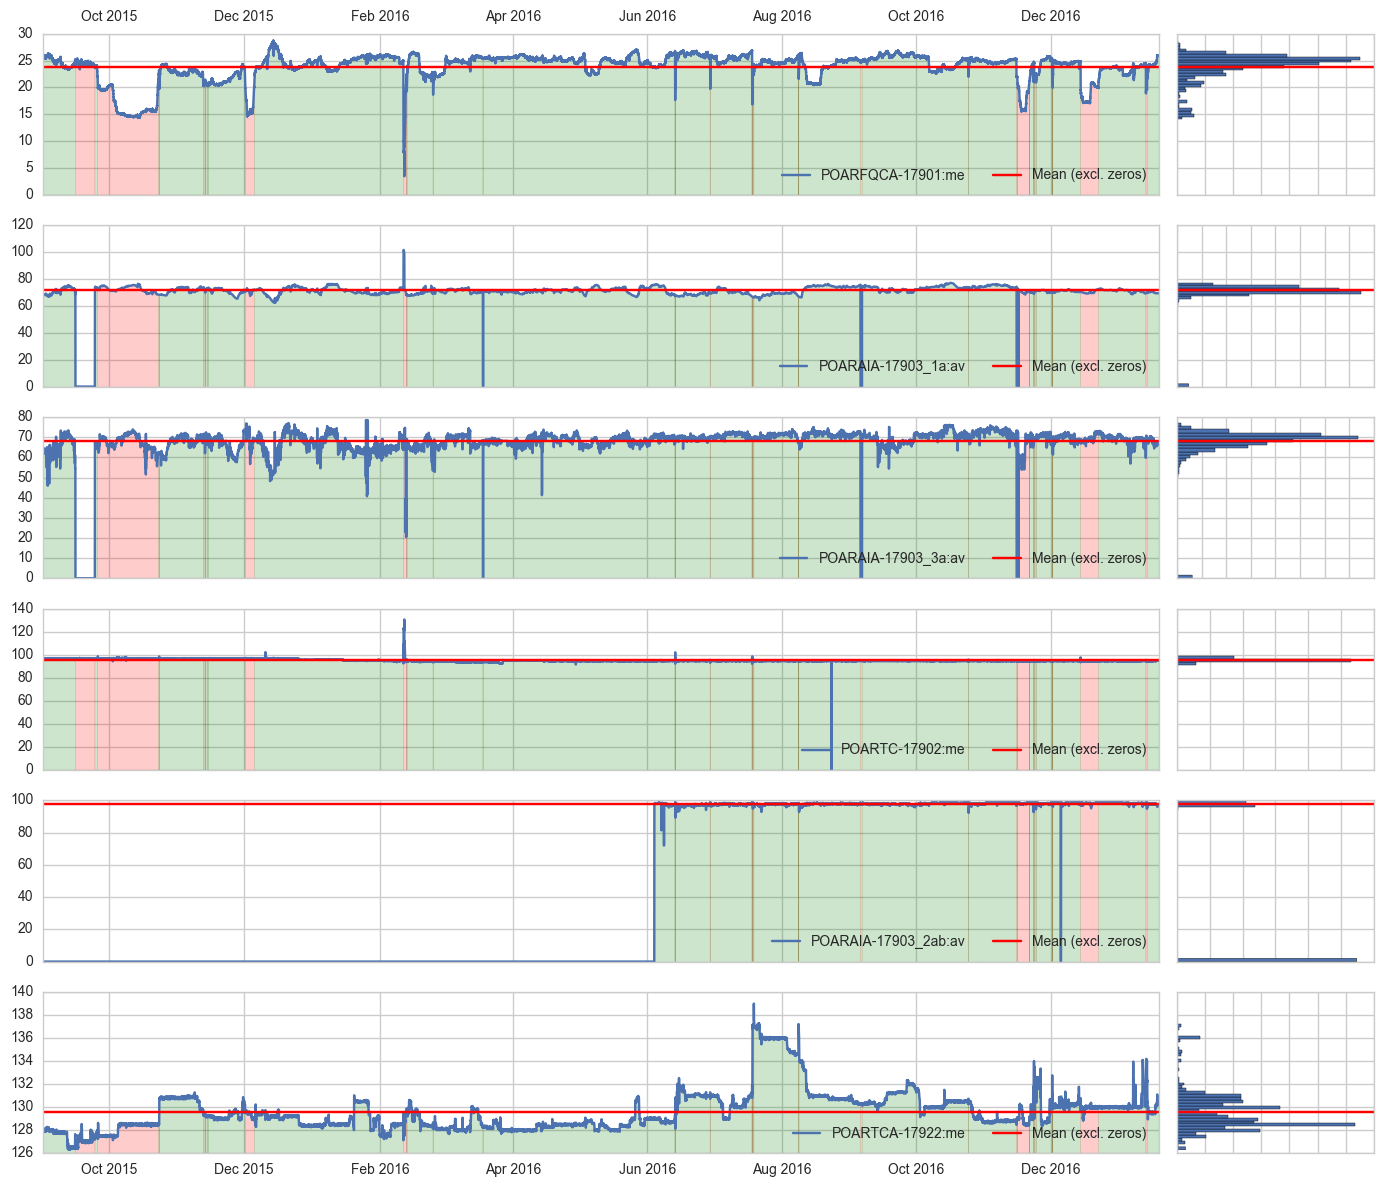

In [7]:
def plottimeseries(df,df_filter):
    numSubPlots = len(df.columns)
    f, axarr = plt.subplots(nrows=numSubPlots, ncols=2, figsize=(14,numSubPlots*2), gridspec_kw = {'width_ratios':[17, 3]})
    for i, tag in enumerate(df.columns):
        axarr[i,0].plot(df.index, df[tag])
        axarr[i,0].axhline(y = df[tag][df[tag]!=0].mean(), color = 'r',label='Mean (excl. zeros)')
        axarr[i,0].fill_between(df.index,y1=axarr[i,0].get_ylim()[0],y2=df[tag],where=df_filter==False,color='r',alpha=0.2)
        axarr[i,0].fill_between(df.index,y1=axarr[i,0].get_ylim()[0],y2=df[tag],where=df_filter==True,color='g',alpha=0.2)
        axarr[i,0].legend(loc='lower right',ncol=2)
        if (i!=numSubPlots-1 and i!=0):
            axarr[i,0].xaxis.set_ticklabels([])
        if i==0:
            axarr[i,0].xaxis.tick_top()
        axarr[i,1].hist(df[tag],bins=50,normed=True,orientation='horizontal')
        axarr[i,1].axhline(y = df[tag][df[tag]!=0].mean(), color = 'r',label='Mean (excl. zeros)')
        axarr[i,1].xaxis.set_ticklabels([])
        axarr[i,1].yaxis.set_ticklabels([])
    plt.tight_layout()
        
plottimeseries(df[[0,1,2,3,4,10]],df_filter['Filter_Global'])

#### Plotting a heatmap of correlations
* for the first 20 variables the Pearson correlation coefficient is plotted.

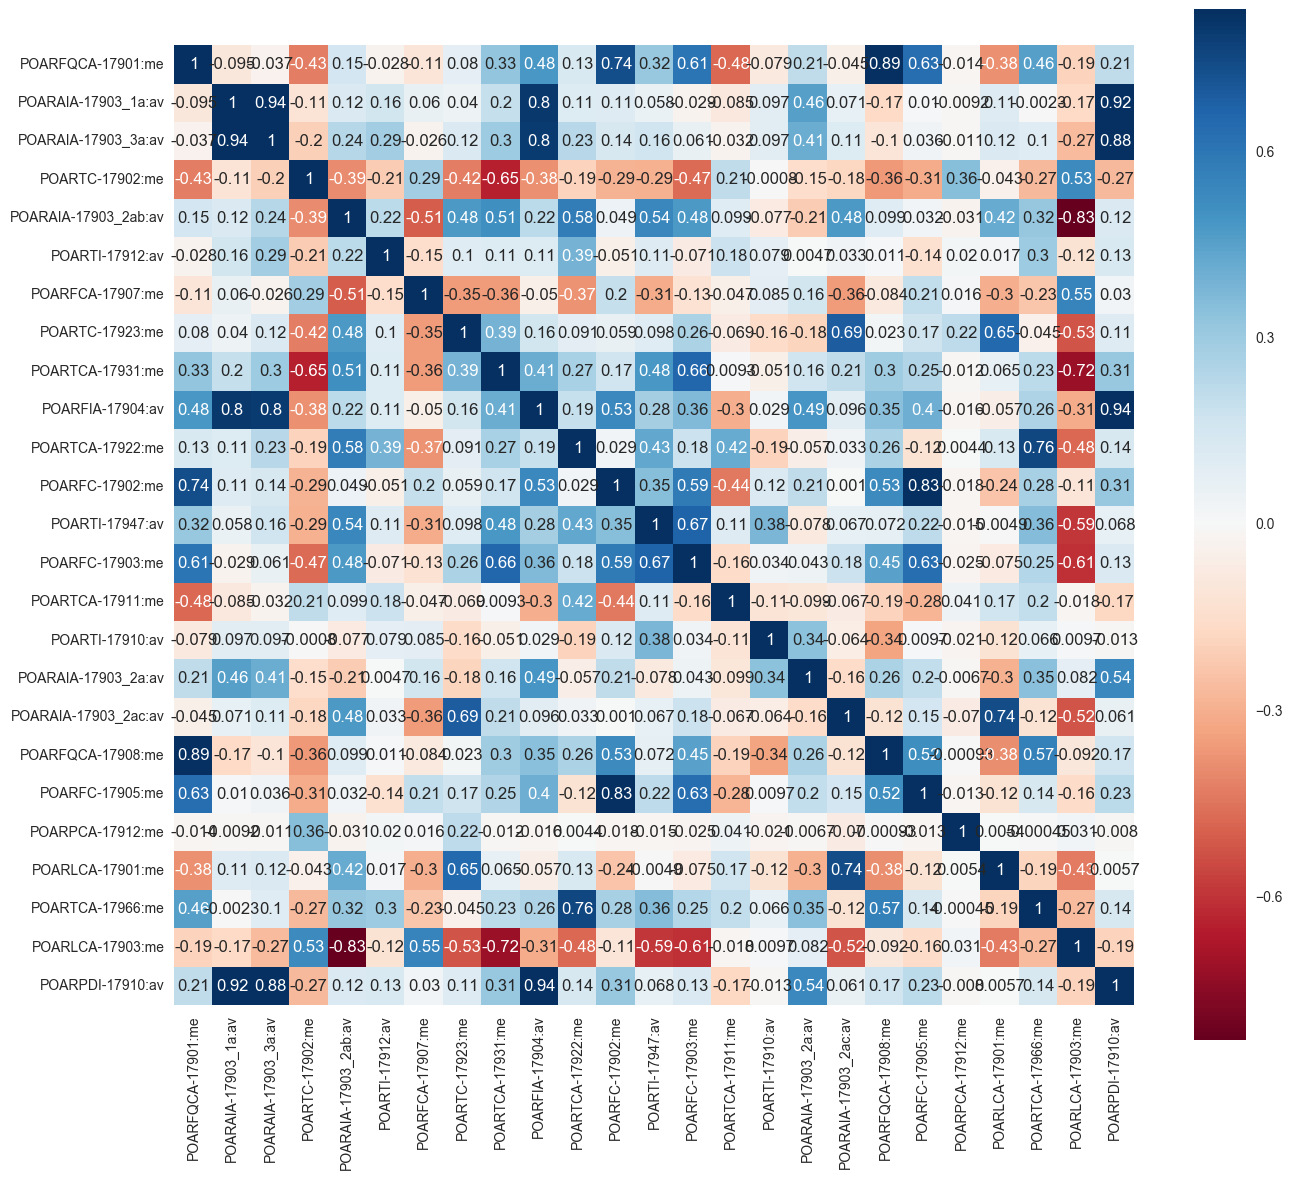

,,0
POARTI-17907:av,POARTCA-17966:me,0.999808
POARPDIA-17906:av,POARPDI-17910:av,0.998487
POARTI-17920:av,POARTCA-17911:me,0.992765
POARTI-17933:av,POARTI-17934:av,0.989856
POARTI-17905:av,POARTCA-17922:me,0.984311
BzFeed,POARFIA-17904:av,0.976177
POARPCA-17917:me,POARTI-17926:av,0.973836
POARTI-17973:av,POARTI-17972:av,0.961347
POARTI-17971:av,POARTI-17970:av,0.959588
POARTI-17908:av,POARTI-17909:av,0.945814


In [62]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(14, 12))
sns.heatmap(corrmat.ix[:25, :25], vmax=.6, square=True, yticklabels=True, annot=True,cmap="RdBu")
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

corrmat.values[np.tril_indices_from(corrmat)] = np.nan
s = corrmat.unstack().abs().sort_values(ascending=False,kind="quicksort")
so = s[s<1][:20]
pd.DataFrame(so)

#### Plotting of rolling correlations
* For 2 variables a rolling correlations is plotted. The sliding window is put to 50 data points.
* This is used to see if correlation stays stable in time.

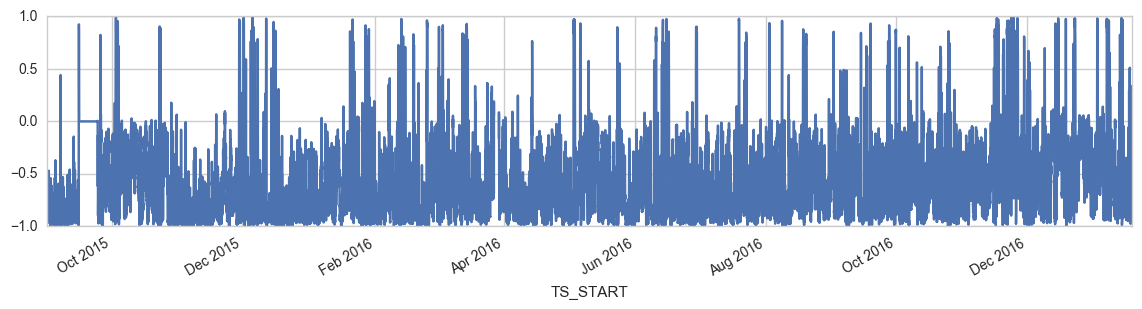

POARFQCA-17901:me - POARAIA-17903_1a:av


In [9]:
correls = df.rolling(window=50).corr()
plt.figure(figsize=(14,3))
correls.loc[:, df.columns[0], df.columns[1]].plot()
plt.show()
print(df.columns[0] + " - " + df.columns[1])

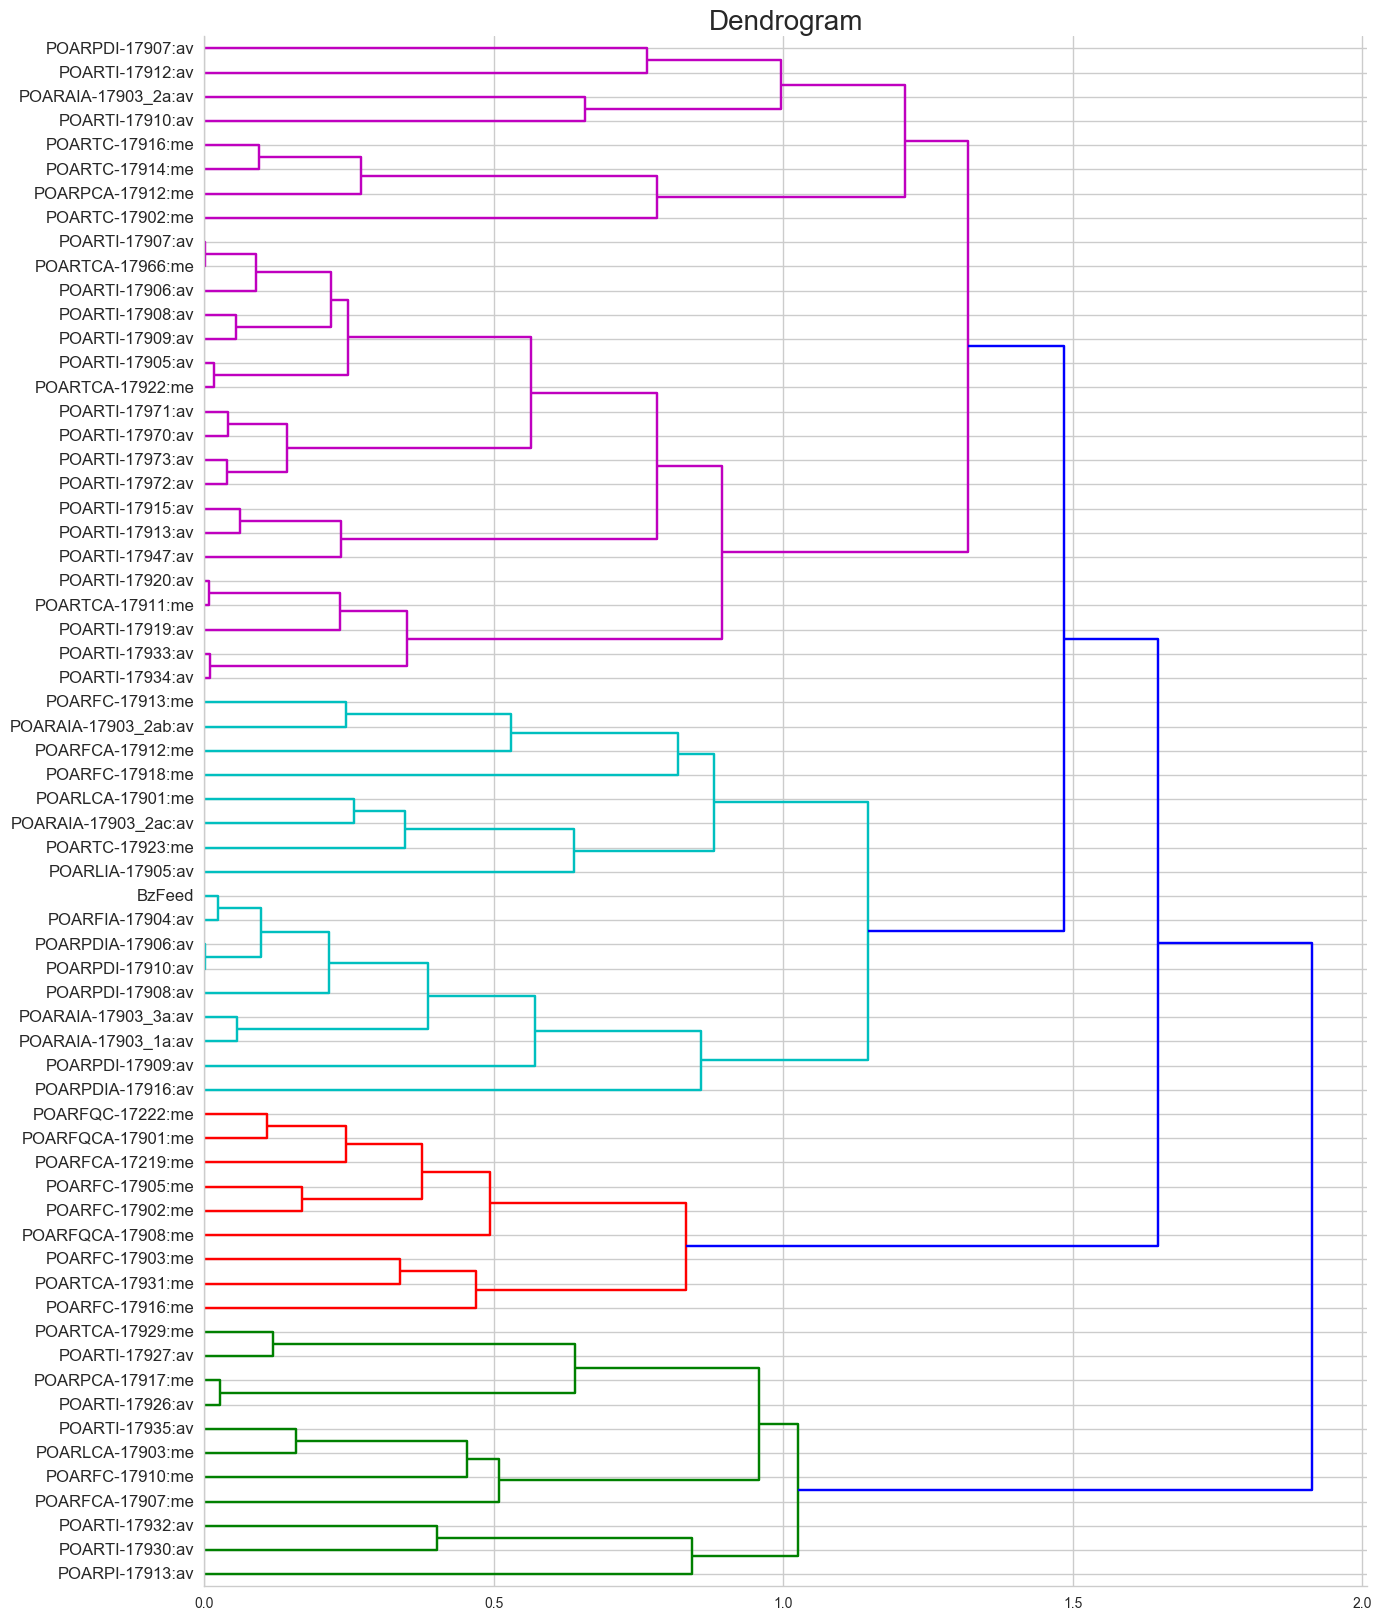

In [32]:
########################################################################
# Feature clustering
########################################################################
import scipy
from sklearn import cluster
agglo = cluster.FeatureAgglomeration(n_clusters=2, affinity='euclidean',linkage='ward')
agglo.fit(df)

from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial import distance
from sklearn import preprocessing
# transform the data between min and max
#    X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
#    X_scaled = X_std * (max - min) + min
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(df)
df_normalized = pd.DataFrame(x_scaled)
features = df.columns.tolist()
df_normalized.columns = features

# create distance matrix
#distmatrix = distance.cdist(df_normalized.as_matrix().T, df_normalized.as_matrix().T)
#df_dist = pd.DataFrame(distmatrix, index = features, columns = features)

# input for linkage is either the samples*features matrix or the distance matrix
#Z = linkage(distance.squareform(df_dist.as_matrix()), 'average')
Z = linkage(df_normalized.T,metric='correlation', method='complete')

#print(Z[:20])

plt.figure(figsize=(15, 20))
#plt.figure(tight_layout=True)
dendrogram(Z,leaf_rotation=0.,leaf_font_size=12.,orientation='right',labels=df.columns)
#dendrogram(Z,leaf_rotation=90.,leaf_font_size=12.,labels=features)
plt.title("Dendrogram",fontsize=20)
#plt.xticks(rotation=90)
#plt.ylabel("Distance (1 - correlation)",fontsize=14)
sns.despine()
plt.show()


In [76]:
from sklearn.cross_validation import train_test_split
#from sklearn.model_selection import train_test_split # as of version 0.18.1
target = 'POARFQC-17222:me'
X=df.drop(target, axis=1)
y=df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=0)
y_train.shape

(94731,)

In [96]:
st=time.time()
from sklearn.linear_model import LassoCV
LCV = LassoCV(eps=0.001, n_alphas=100, alphas=None, fit_intercept=True, normalize=False, 
              precompute='auto', max_iter=1000, tol=0.0001, copy_X=True, cv=None, verbose=False, 
              n_jobs=-1, positive=False, random_state=None, selection='cyclic')
LCV.fit(X_train, y_train)
print(time.time()-st)
print(LCV.score(X_test,y_test))
importances = LCV.coef_
indices = np.argsort(importances)[::-1]
names = X_train.columns[indices]
abs_importances = abs(LCV.coef_)
abs_indices=np.argsort(abs_importances)[::-1]
abs_names=X_train.columns[abs_indices]
# Print the feature ranking
l = []
for f in range(X_train.shape[1]):
    d = {}
    d["feature"] = abs_names[f]
    d["abs var explained"] = abs_importances[abs_indices[f]]
    d["variance explained"] = importances[abs_indices[f]]
    #print("%d. feature %s (%f)" % (f + 1, names[f], importances[indices[f]]))
    #if f >= 19:
    #   break
    l.append(d)

df_importance = pd.DataFrame(l)
df_importance.head(10)

28.528876304626465
0.97818824271


,abs var explained,feature,variance explained
0,0.243737,POARPI-17913:av,0.243737
1,0.235117,POARTCA-17911:me,-0.235117
2,0.224570,POARTI-17926:av,-0.224570
3,0.130021,POARFQCA-17901:me,0.130021
4,0.109396,POARPCA-17917:me,-0.109396
5,0.103956,POARTC-17902:me,-0.103956
6,0.102474,POARFIA-17904:av,0.102474
7,0.052343,POARTC-17923:me,0.052343
8,0.047496,POARTI-17920:av,-0.047496
9,0.044922,POARTI-17910:av,0.044922


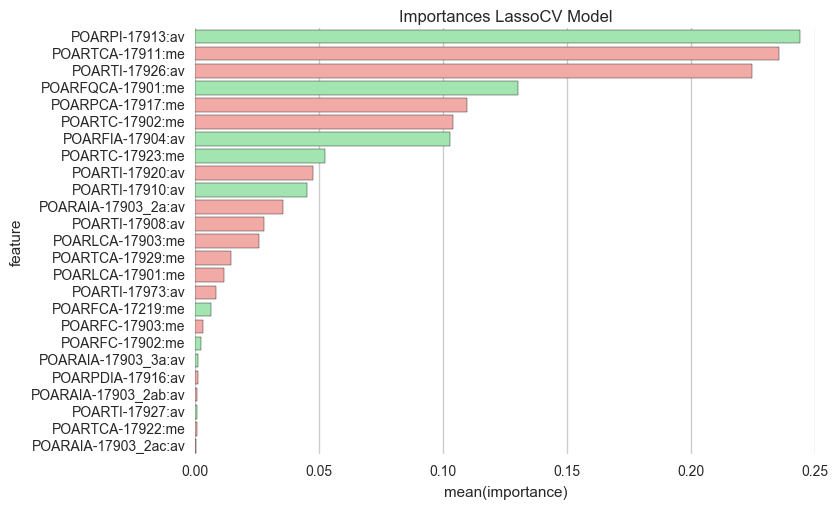

In [92]:
colorpalette = ['r' if coef < 0 else 'g' for coef in df_importance["variance explained"]]
numImp=25
df_imp = pd.DataFrame()
df_imp['feature']=abs_names[:numImp]
df_imp['importance']=abs_importances[abs_indices[:numImp]]

plt.figure()
plt.title('Importances LassoCV Model')
sns.set_color_codes("pastel")
sns.barplot(x='importance',y='feature',data=df_imp,palette=colorpalette)
sns.despine(left=True, bottom=True)
plt.show()
